<a href="https://colab.research.google.com/github/nmwiley808/csci167/blob/main/Notebooks/Chap10/10_5_Convolution_For_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.5: Convolution for MNIST**

This notebook builds a proper network for 2D convolution.  It works with the MNIST dataset (figure 15.15a), which was the original classic dataset for classifying images.  The network will take a 28x28 grayscale image and classify it into one of 10 classes representing a digit.

The code is adapted from https://nextjournal.com/gkoehler/pytorch-mnist

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

In [2]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches

# (It may complain that some files are missing because the files seem to have been
# reorganized on the underlying website, but it still seems to work). If everything is working
# properly, then the whole notebook should run to the end without further problems
# even before you make changes.
batch_size_train = 64
batch_size_test = 1000

# TODO Change this directory to point towards an existing directory
myDir = '/files/'

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(myDir, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(myDir, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 60.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.68MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.12MB/s]


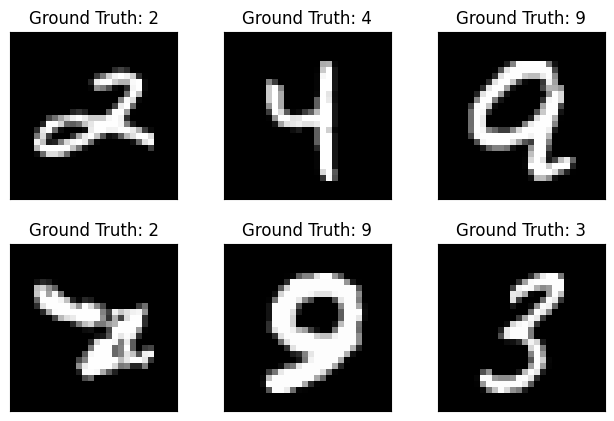

In [3]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

Define the network.  This is a more typical way to define a network than the sequential structure.  We define a class for the network, and define the parameters in the constructor.  Then we use a function called forward to actually run the network.  It's easy to see how you might use residual connections in this format.

In [4]:


from os import X_OK
# TODO Change this class to implement
# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Valid convolution, 1 channel in, 2 channels out, stride 1, kernel size = 3
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3)
        # Dropout for convolutions
        self.drop = nn.Dropout2d()
        # Fully connected layer
        self.fc1 = nn.Linear(338, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.drop(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.log_softmax(x)
        return x







In [5]:
from os import X_OK
# TODO Change this class to implement
# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

# Replace this class which implements a minimal network (which still does okay)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1. Convolution: kernel size 5, 1 input channel, 10 output channels
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        # 2. Max Pooling: 2x2 area
        self.pool1 = nn.MaxPool2d(2)
        # 3. ReLU
        # (ReLU is applied within the forward method)

        # 4. Convolution: kernel size 5, 10 input channels, 20 output channels
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        # 5. Dropout: 2D
        self.dropout2d = nn.Dropout2d(p=0.5)  # Adjust p as needed
        # 6. Max Pooling: 2x2 area
        self.pool2 = nn.MaxPool2d(2)
        # 7. ReLU
        # (ReLU is applied within the forward method)

        # 8. Flattening
        self.flatten = nn.Flatten()

          # 9. Fully Connected:  to 50 (input size calculated dynamically)
        self.fc1 = None # Placeholder, will be initialized in forward

        # 10. ReLU
        # (ReLU is applied within the forward method)

        # 11. Fully Connected: 50 to 10
        self.fc2 = nn.Linear(50, 10)
        # 12. Softmax (or LogSoftmax)
        # (Applied within the forward method)

    def forward(self, x):
        # Apply layers sequentially, with activations
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.dropout2d(self.conv2(x))))

        x = self.flatten(x)

        # Dynamically calculate and initialize fc1 input size
        if self.fc1 is None:
            input_size = x.shape[1]
            self.fc1 = nn.Linear(input_size, 50)

        x = F.relu(self.fc1(x))
        x = self.fc2(x) # Output from fc2

        # Apply softmax for classification
        # Consider using log_softmax for better numerical stability during training
        x = F.log_softmax(x, dim=1) # Apply LogSoftmax

        return x

In [6]:
# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [7]:
# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [8]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [9]:
# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [10]:
# Get initial performance
test()
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.12/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3475, Accuracy: 655/10000 (7%)

Train Epoch: 1 [0/60000]	Loss: 2.467821
Train Epoch: 1 [640/60000]	Loss: 2.304271
Train Epoch: 1 [1280/60000]	Loss: 2.279084
Train Epoch: 1 [1920/60000]	Loss: 2.175556
Train Epoch: 1 [2560/60000]	Loss: 2.244283
Train Epoch: 1 [3200/60000]	Loss: 2.309061
Train Epoch: 1 [3840/60000]	Loss: 2.213626
Train Epoch: 1 [4480/60000]	Loss: 2.233685
Train Epoch: 1 [5120/60000]	Loss: 2.168968
Train Epoch: 1 [5760/60000]	Loss: 2.172704
Train Epoch: 1 [6400/60000]	Loss: 2.054747
Train Epoch: 1 [7040/60000]	Loss: 2.150351
Train Epoch: 1 [7680/60000]	Loss: 2.039766
Train Epoch: 1 [8320/60000]	Loss: 2.064471
Train Epoch: 1 [8960/60000]	Loss: 1.919141
Train Epoch: 1 [9600/60000]	Loss: 1.981534
Train Epoch: 1 [10240/60000]	Loss: 1.984507
Train Epoch: 1 [10880/60000]	Loss: 1.853008
Train Epoch: 1 [11520/60000]	Loss: 1.925925
Train Epoch: 1 [12160/60000]	Loss: 1.734257
Train Epoch: 1 [12800/60000]	Loss: 1.630544
Train Epoch: 1 [13440/60000]	Loss: 1.819

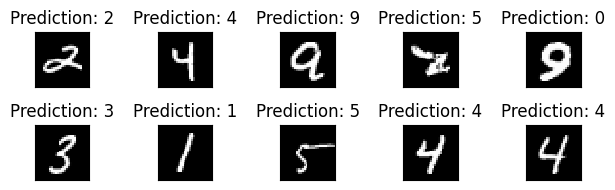

In [11]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()